In [1]:
import json
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [2]:
data = {}
time_format = "%m/%d/%Y %H:%M:%S.%f"
with open('data.json', 'r') as fp:
    data = json.load(fp)

In [3]:
for key in data:
    # Find mean and median of job completion times
    master_data = data[key]['master_data']
    job_times = []
    jobs = master_data['jobs']
    for job_obj in jobs:
        job_id = job_obj['job_id']
        arrival_time = dt.strptime(job_obj['arrival_time'], time_format)
        end_time = dt.strptime(job_obj['end_time'], time_format)
        job_times.append((end_time - arrival_time).total_seconds())
        
    job_times = np.array(job_times)
    print("%s: " % key.upper())
    print("\t Mean time of job completion: %s" % np.mean(job_times))
    print("\t Median time of job completion: %s" % np.median(job_times))
    
    # Find mean and median of task completion times
    worker_data = data[key]['worker_data']
    task_times = []
    
    for worker_id in worker_data:
        for task_obj in worker_data[worker_id]:    
            task_id = task_obj['task_id']
            arrival_time = dt.strptime(task_obj['arrival_time'], time_format)
            end_time = dt.strptime(task_obj['end_time'], time_format)
            task_times.append((end_time - arrival_time).total_seconds())
        
    task_times = np.array(task_times)
    print("\t Mean time of task completion: %s" % np.mean(task_times))
    print("\t Median time of task completion: %s" % np.median(task_times))

RR: 
	 Mean time of job completion: 8.4903
	 Median time of job completion: 8.2405
	 Mean time of task completion: 3.1834583333333333
	 Median time of task completion: 3.0515
LL: 
	 Mean time of job completion: 7.593500000000001
	 Median time of job completion: 7.525499999999999
	 Mean time of task completion: 3.1287083333333334
	 Median time of task completion: 3.0025
R: 
	 Mean time of job completion: 10.183200000000001
	 Median time of job completion: 10.0355
	 Mean time of task completion: 3.208263888888889
	 Median time of task completion: 3.0614999999999997


In [4]:
# Plot graphs
from scipy.ndimage.filters import gaussian_filter1d

color_list = ['red', 'blue', 'orange', 'green', 'black', 'brown']

def plot_slots(key):
    timestamps = data[key]['master_data']['tasks']
    num_timestamps = len(timestamps) - 1
    
    worker_ids = list(timestamps[0].keys())
    num_workers = len(worker_ids)
    
    timestamp_list = []
    plot_object = {}
    for worker_id in worker_ids:
        plot_object[worker_id] = []
                
    starting_time = dt.strptime(timestamps[1]['timestamp'], time_format)
        
    for timestamp in timestamps[1:]:
        timestamp_obj = dt.strptime(timestamp['timestamp'], time_format)
        timestamp_list.append((timestamp_obj - starting_time).total_seconds())
        
        for worker_id in worker_ids:
            plot_object[worker_id].append(timestamp[worker_id])
            
    for index in range(num_workers):
        ysmoothed = gaussian_filter1d(plot_object[worker_ids[index]], sigma=5)
        plt.plot(timestamp_list, ysmoothed, color = color_list[index], label="Worker %s" % worker_ids[index])
        plt.legend()
        
    plt.title("Slots occupied Plot for: %s" % key.upper())
    plt.xlabel("Timestamp")
    plt.ylabel("Slots occupied")
    plt.savefig("%s.png"%key)
    plt.show()
        
    

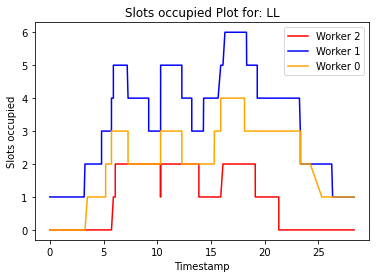

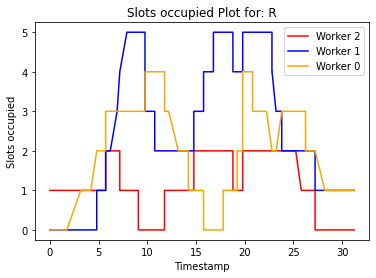

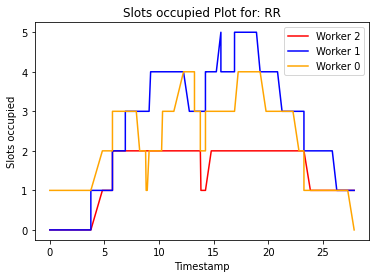

In [5]:
plot_slots('ll')
plot_slots('r')
plot_slots('rr')